<a href="https://colab.research.google.com/github/nataliaJanasiewicz/MIW/blob/main/projekt2/G12c_s22847_Proj2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Perpetron 

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

        # konfiguruje generator znaczników i mapę kolorów
        markers = ('s', 'x', 'o', '^', 'v')
        colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
        cmap = ListedColormap(colors[:len(np.unique(y))])

        # rysuje wykres powierzchni decyzyjnej
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        Z = Z.reshape(xx1.shape)
        plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())

        # rysuje wykres wszystkich próbek
        for idx, cl in enumerate(np.unique(y)):
            plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets

class Perceptron(object):

    # Konstruktor, podajemy współczynik uczenia sie oraz ilość epok
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1+ X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update *xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

#utworzenie klasy ktora przyjmuje 2 perceptrony
class Classifier:
  #konstruktor
    def __init__(self, ppn1, ppn2):
        self.ppn1 = ppn1
        self.ppn2 = ppn2
        
    # metoda przewidywania wyniku dla 3 klas
    def predict(self, x):
        return np.where(self.ppn1.predict(x) == 1, 0, np.where(self.ppn2.predict(x) == 1, 2, 1))
      

do znajduwania klasy 0:  [ 1  1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1 -1  1  1
 -1 -1  1 -1 -1  1  1  1 -1 -1  1 -1  1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1 -1 -1 -1  1  1 -1  1 -1 -1 -1 -1  1 -1
 -1  1  1 -1  1 -1  1  1  1]
do znajdywania klasy 2:  [-1 -1  1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1 -1 -1
 -1  1 -1  1  1  1 -1 -1  1  1  1  1 -1  1  1 -1  1 -1  1 -1 -1 -1 -1 -1
  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1  1 -1
 -1  1  1 -1 -1 -1  1 -1  1  1 -1 -1  1  1 -1 -1  1 -1  1 -1 -1 -1 -1  1
 -1 -1 -1 -1 -1 -1 -1 -1 -1]
wyniki testu 1:  [ 1  1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1 -1  1  1
 -1 -1  1 -1 -1  1  1  1 -1 -1  1 -1  1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1 -1 -1 -1  1  1 -1  1 -1 -1 -1 -1  1 -1

<ipython-input-12-c3925fdf5904>:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')
<ipython-input-12-c3925fdf5904>:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')


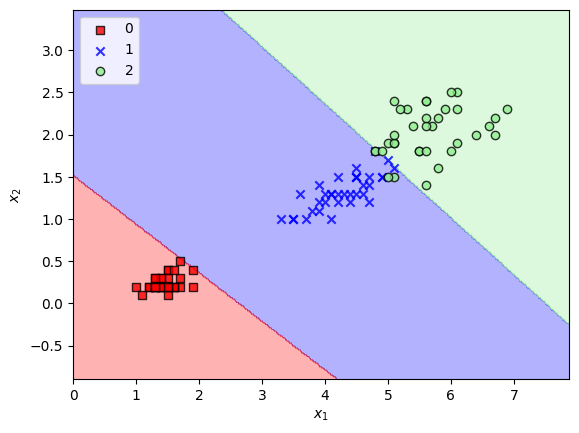

In [ ]:
from sklearn.metrics import accuracy_score

def main():
    #pobranie danych iris
    iris = datasets.load_iris()
    X = iris.data[:, [2, 3]] # wybór kolumn 2 i 3 jako zmiennych
    y = iris.target # wybór zmiennej objaśnianej

    #podzial zbioru na testowy  i treningowy
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) # Divide downloaded data into testing and training data

    #uworzenie zbiorow do znalezienia klas
    y_train_01_subset = y_train.copy() # do znalezienia klasy 0 i innw jako -1
    y_train_02_subset = y_train.copy() # do znalezienia klasy 2 i 1 jako -1
    
    #zbior do trenowania
    X_train_01_subset = X_train.copy()

    #przypisanie wartosci tak aby rozpoznawalo tylko klase 0 
    y_train_01_subset[(y_train == 1) | (y_train == 2)] = -1
    y_train_01_subset[(y_train_01_subset == 0)] = 1

    #przypisanie wartosci tak aby znajowalo tylko klase 2
    y_train_02_subset[(y_train == 1) | (y_train == 0)] = -1
    y_train_02_subset[(y_train_02_subset == 2)] = 1

    #wyswietlenie
    print('do znajdywania klasy 0: ', y_train_01_subset)
    print('do znajdywania klasy 2: ', y_train_02_subset)

    #tworzenie perceptronow
    ppn1 = Perceptron(eta=0.1, n_iter=300) # Perceptron 1
    #trenowanie 1
    ppn1.fit(X_train_01_subset, y_train_01_subset)

    ppn2 = Perceptron(eta=0.1, n_iter=300) # Perceptron 2
    #trenowanie 2
    ppn2.fit(X_train_01_subset, y_train_02_subset)

    #predykcja
    y1_predict = ppn1.predict(X_train)
    y2_predict = ppn2.predict(X_train)

    print('wyniki testu 1: ', y1_predict)
    print('wyniki testu 2: ', y2_predict)

    #obliczenie dokladnosci
    accuracy_1 = accuracy(ppn1.predict(X_train), y_train_01_subset)
    accuracy_2 = accuracy(ppn2.predict(X_train), y_train_02_subset)
    print("Perceptron 1 dokladosc: ", accuracy_1)
    print("Perceptron 2 dokladosc: ", accuracy_2)

    #obliczenie dokladnosci dla calego zbioru
    total_accuracy(accuracy_1, accuracy_2)

    #utworzenie klasyfikatora
    classifier = Classifier(ppn1, ppn2)

    #ustawianie zmiennych i wtorzenie grafu
    plot_decision_regions(X = X_train, y = y_train, classifier=classifier)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.legend(loc='upper left')
    #wyswietlenie grafu
    plt.show()

def accuracy(y_results, y_train):
    return accuracy_score(y_results, y_train)

def total_accuracy(accuracy_1, accuracy_2):
    total_accuracy = (accuracy_1 + accuracy_2) / 2
    print("calkowita dokladnosc: ", total_accuracy)
    

if __name__ == '__main__':
    main()

2. regresja logistyczna

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split


class LogisticRegressionGD(object):
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))))
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

#klasa do 2 regresji
class Classifier:
    def __init__(self, lrgd1, lrgd2):
        self.lrgd1 = lrgd1
        self.lrgd2 = lrgd2

    def predict(self, x):
        return np.where(self.lrgd1.predict(x) == 1, 0, np.where(self.lrgd2.predict(x) == 1, 2, 1))
      

do znajdywania klasy 0:  [1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1]
do znajdywania klasy 2:  [0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 0
 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1
 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
tuuuuu1  [9.99033258e-01 9.97228993e-01 1.23073195e-08 8.96504048e-09
 9.99521243e-01 2.48570232e-09 3.78631121e-10 9.99521243e-01
 9.61302594e-08 3.35043097e-05 1.63276896e-02 2.27688929e-04
 9.99319652e-01 4.06439546e-05 2.76197171e-04 2.19776315e-07
 9.94417618e-01 8.14915669e-03 6.76630562e-04 9.98048850e-01
 1.08816530e-06 4.43506069e-11 1.60179712e-05 4.76210030e-05
 1.65665420e-03 2.48570232e-09 1.36710829e-05 5.77394511e-07
 3.65801839e-09 1.44201270e-08 1.94334896e-04 9.95927442e-01
 1.54493401e-10 3.1238116

<ipython-input-2-8f2e3b9a5fa7>:24: RuntimeWarning: divide by zero encountered in log
  cost = (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))))
<ipython-input-1-c3925fdf5904>:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')
<ipython-input-1-c3925fdf5904>:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')


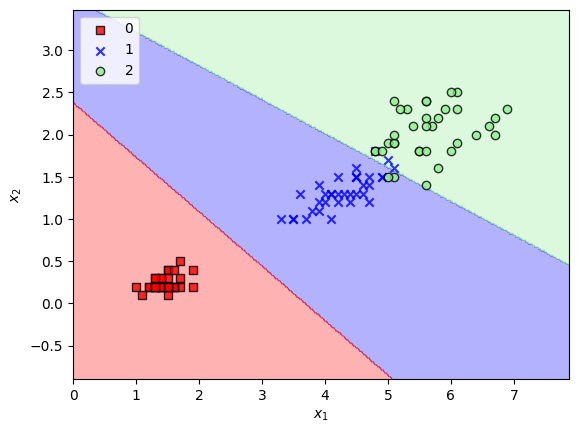

In [ ]:
from sklearn.metrics import accuracy_score

def main():
    iris = datasets.load_iris()
    X = iris.data[:, [2, 3]]
    y = iris.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

    y_train_01_subset = y_train.copy()
    y_train_02_subset = y_train.copy()

    X_train_01_subset = X_train.copy()

    y_train_01_subset[(y_train == 1) | (y_train == 2)] = -1
    y_train_01_subset[(y_train_01_subset == 0)] = 1
    y_train_01_subset[(y_train_01_subset == -1)] = 0

    y_train_02_subset[(y_train == 1) | (y_train == 0)] = 0
    y_train_02_subset[(y_train_02_subset == 2)] = 1

    print('do znajdywania klasy 0: ', y_train_01_subset)
    print('do znajdywania klasy 2: ', y_train_02_subset)

    lrgd1 = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
    lrgd1.fit(X_train_01_subset, y_train_01_subset)

    lrgd2 = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
    lrgd2.fit(X_train_01_subset, y_train_02_subset)

    print("tuuuuu1 ",lrgd1.activation(lrgd1.net_input(X_train_01_subset)))
    print("tuuuuu2 ",lrgd2.activation(lrgd2.net_input(X_train_01_subset)))

    y1_predict = lrgd1.predict(X_train_01_subset)
    y2_predict = lrgd2.predict(X_train_01_subset)

    print("Regresja logistyczna 1 wyniki: ", y1_predict)
    print("Regresja logistyczna 2 wyniki: ", y2_predict)

    accuracy_1 = accuracy(y1_predict, y_train_01_subset)
    accuracy_2 = accuracy(y2_predict, y_train_02_subset)

    print("Regresja logistyczna 1 dokladosc: ", accuracy_1)
    print("Regresja logistyczna 2 dokladosc: ", accuracy_2)

    total_accuracy(accuracy_1, accuracy_2)

    _classifier = Classifier(lrgd1, lrgd2)

    plot_decision_regions(X = X_train, y = y_train, classifier=_classifier)

    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.legend(loc='upper left')
    plt.show()
    


def accuracy(y_results, y_train):
    return accuracy_score(y_results, y_train)

def total_accuracy(accuracy_1, accuracy_2):
    total_accuracy = (accuracy_1 + accuracy_2) / 2
    print("calkowita dokladnosc: ", total_accuracy)


if __name__ == '__main__':
    main()


## TESTY

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split


class LogisticRegressionGD1(object):
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))))
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

    def predict_proba(self, X):
        output = self.predict(X)
        return np.vstack((1 - output, output)).T

class Classifier1:
    def __init__(self, lrgd1, lrgd2, lrgd3):
        self.lrgd1 = lrgd1
        self.lrgd2 = lrgd2
        self.lrgd3 = lrgd3

    def predict(self, x):
        return np.where(self.lrgd1.predict(x) == 1, 0, np.where(self.lrgd2.predict(x) == 1, 1, np.where(self.lrgd3.predict(x) == 1, 2, -1)))
      

dla 0:  [1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1]
dla 1:  [0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0
 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0]
dla 2:  [0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 0
 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1
 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


<ipython-input-20-69d1453edaa8>:24: RuntimeWarning: divide by zero encountered in log
  cost = (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))))


wynik 1:  [1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1]
wynik 2:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
wynik 3:  [0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 0
 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1
 1 0 0 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0]
dokladnosc 1:  1.0
dokladnosc 2:  0.6571428571428571
dokladnosc 3:  0.9523809523809523
calkowita dokladnosc:  0.8285714285714285


<ipython-input-12-c3925fdf5904>:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')
<ipython-input-12-c3925fdf5904>:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')


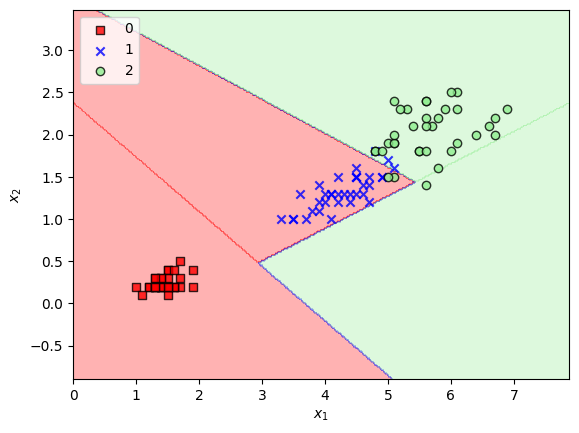

In [ ]:
from sklearn.metrics import accuracy_score
def main():
    iris = datasets.load_iris()
    X = iris.data[:, [2, 3]]
    y = iris.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

    y_train_01_subset = y_train.copy()
    y_train_02_subset = y_train.copy()
    y_train_03_subset = y_train.copy()

    X_train_01_subset = X_train.copy()

    y_train_01_subset[(y_train == 1) | (y_train == 2)] = -1
    y_train_01_subset[(y_train_01_subset == 0)] = 1
    y_train_01_subset[(y_train_01_subset == -1)] = 0

    y_train_02_subset[(y_train == 2) | (y_train == 0)] = 0
    y_train_02_subset[(y_train_02_subset == 1)] = 1

    y_train_03_subset[(y_train == 1) | (y_train == 0)] = 0
    y_train_03_subset[(y_train_03_subset == 2)] = 1

    print('dla 0: ', y_train_01_subset)
    print('dla 1: ', y_train_02_subset)
    print('dla 2: ', y_train_03_subset)

    lrgd1 = LogisticRegressionGD1(eta=0.05, n_iter=1000, random_state=1)
    lrgd1.fit(X_train_01_subset, y_train_01_subset)

    lrgd2 = LogisticRegressionGD1(eta=0.05, n_iter=1000, random_state=1)
    lrgd2.fit(X_train_01_subset, y_train_02_subset)

    lrgd3 = LogisticRegressionGD1(eta=0.05, n_iter=1000, random_state=1)
    lrgd3.fit(X_train_01_subset, y_train_03_subset)

    y1_predict = lrgd1.predict(X_train_01_subset)
    y2_predict = lrgd2.predict(X_train_01_subset)
    y3_predict = lrgd3.predict(X_train_01_subset)

    print("wynik 1: ", y1_predict)
    print("wynik 2: ", y2_predict)
    print("wynik 3: ", y3_predict)

    accuracy_1 = accuracy(y1_predict, y_train_01_subset)
    accuracy_2 = accuracy(y2_predict, y_train_02_subset)
    accuracy_3 = accuracy(y3_predict, y_train_03_subset)

    print("dokladnosc 1: ", accuracy_1)
    print("dokladnosc 2: ", accuracy_2)
    print("dokladnosc 3: ", accuracy_3)

    total_accuracy(accuracy_1, accuracy_2)

    _classifier = Classifier1(lrgd1, lrgd2, lrgd3)

    plot_decision_regions(X = X_train, y = y_train, classifier=_classifier)

    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.legend(loc='upper left')
    plt.show()


def accuracy(y_results, y_train):
    return accuracy_score(y_results, y_train)

def total_accuracy(accuracy_1, accuracy_2):
    total_accuracy = (accuracy_1 + accuracy_2) / 2
    print("calkowita dokladnosc: ", total_accuracy)


if __name__ == '__main__':
    main()